## 데이터 불러오기 및 분석하기

In [ ]:
cd /content/sample_data/DATA/

/content/sample_data/DATA


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
DATA_PATH = '/content/sample_data/DATA/'
print('파일 크기: ')
for file in os.listdir(DATA_PATH):
  if 'txt' in file:
    print(file.ljust(30)+str(round(os.path.getsize(DATA_PATH+ file) / 100000,2))+'MB')

파일 크기: 
ratings_train.txt             146.29MB
ratings.txt                   195.15MB
ratings_test.txt              48.93MB


In [ ]:
#트레인 파일 불러오기
train_data = pd.read_csv(DATA_PATH + 'ratings_train.txt',header = 0, delimiter = '\t', quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
print('학습데이터 전체 개수: {}'.format(len(train_data)))

학습데이터 전체 개수: 150000


In [ ]:
#리뷰 전체길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

,document
0,19
1,33
2,17
3,29
4,61


In [ ]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


## 데이터 빈도 분석- 워드 클라우드 만들기

In [ ]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
#긍정 1, 부정 0
print('긍정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 갯수: 74827
부정 리뷰 갯수: 75173


## 데이터 전처리

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 38.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

DATA_PATH = '/content/sample_data/DATA/'
train_data = pd.read_csv(DATA_PATH+'ratings_train.txt', header = 0, delimiter='\t', quoting=3)

In [ ]:
train_data['document'][:5]

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...


## 텍스트 전처리


1.   한글 아닌 문자들 제거
2.   문장을 단어로 나누기(어간추출)
3.   불용어 제거



In [ ]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)

  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [ ]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [ ]:
type(clean_train_review)

list

In [ ]:
#테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv(DATA_PATH + 'ratings_test.txt', header = 0, delimiter='\t', quoting=3)

clean_test_review = []
for review in test_data['document']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

## 리뷰를 인덱스 벡터로 변환

In [ ]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

## 모델링 과정에서 사용 가능하도록 전처리 데이터 넘파이 저장

In [ ]:
DEFAULT_PATH  = '/content/sample_data/'
DATA_PATH = 'CLEAN_DATA/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

## 모델링

In [ ]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

In [ ]:
#전처리 데이터 불러오기
DATA_PATH = '/content/sample_data/CLEAN_DATA/'
DATA_OUT = '/content/sample_data/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

## 파라미터 세팅

In [ ]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {
    'model_name': model_name,
    'vocab_size': prepro_configs['vocab_size'],
    'embbeding_size': 128,
    'num_filters': 100,
    'dropout_rate': 0.5,
    'hidden_dimension': 250,
    'output_dimension': 1
}


## 모델 함수 만들기

In [ ]:
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))


  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

class BiLSTMAttention(tf.keras.Model):
    def __init__(self, **kargs):
        super(BiLSTMAttention, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
        self.bi_lstm = layers.Bidirectional(layers.LSTM(kargs['lstm_units'], return_sequences=True))
        self.attention = layers.Attention()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc = layers.Dense(units=kargs['output_dimension'], activation=tf.keras.activations.sigmoid)

    def call(self, x):
        x = self.embedding(x)
        lstm_out = self.bi_lstm(x)
        attention_out = self.attention([lstm_out, lstm_out])
        x = self.dropout(attention_out)
        x = tf.reduce_mean(x, axis=1)  # Pooling
        x = self.fc(x)
        return x

class TransformerClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(TransformerClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = tf.keras.layers.Embedding(
            input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size']
        )
        self.positional_encoding = tf.keras.layers.LayerNormalization()
        self.transformer_layers = [
            tf.keras.layers.MultiHeadAttention(
                num_heads=kargs['num_heads'], key_dim=kargs['embbeding_size']
            ) for _ in range(kargs['num_layers'])
        ]
        self.dropout = tf.keras.layers.Dropout(kargs['dropout_rate'])
        self.global_pool = tf.keras.layers.GlobalAveragePooling1D()
        self.fc = tf.keras.layers.Dense(
            units=kargs['hidden_dimension'], activation='relu'
        )
        self.output_layer = tf.keras.layers.Dense(
            units=kargs['output_dimension'], activation='sigmoid'
        )

    def call(self, x):
        x = self.embedding(x)
        x = self.positional_encoding(x)
        for transformer_layer in self.transformer_layers:
            x = transformer_layer(x, x)  # Self-attention
        x = self.global_pool(x)
        x = self.dropout(x)
        x = self.fc(x)
        x = self.output_layer(x)
        return x

class HybridCNNRNN(tf.keras.Model):
    def __init__(self, model_name, vocab_size, embbeding_size, num_filters, lstm_units, dropout_rate, output_dimension):
        super(HybridCNNRNN, self).__init__()
        self.model_name = model_name  # 모델 이름 저장
        self.embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embbeding_size)
        self.conv = tf.keras.layers.Conv1D(filters=num_filters, kernel_size=3, activation='relu')
        self.pooling = tf.keras.layers.GlobalMaxPooling1D()
        self.lstm = tf.keras.layers.LSTM(units=lstm_units, return_sequences=False)
        self.dropout = tf.keras.layers.Dropout(rate=dropout_rate)
        self.fc = tf.keras.layers.Dense(units=output_dimension, activation='sigmoid')

    def call(self, x):
        x = self.embedding(x)  # (batch_size, sequence_length, embedding_size)
        x = self.conv(x)       # (batch_size, new_sequence_length, num_filters)
        x = self.pooling(x)    # (batch_size, num_filters)
        x = tf.expand_dims(x, axis=1) if len(x.shape) == 2 else x  # 3차원으로 맞춤
        x = self.lstm(x)       # (batch_size, lstm_units)
        x = self.dropout(x)
        x = self.fc(x)         # (batch_size, output_dimension)
        return x

## 모델 학습

In [ ]:
# model = CNNClassifier(**kargs)
# model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss = tf.keras.losses.BinaryCrossentropy(),
#               metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

# #검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
# earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
# checkpoint_path = os.path.join(DATA_OUT, model_name, 'weights.weights.h5')
# checkpoint_dir = os.path.dirname(checkpoint_path)

# if os.path.exists(checkpoint_dir):
#   print("{} -- Folder already exists \n".format(checkpoint_dir))
# else:
#   os.makedirs(checkpoint_dir, exist_ok=True)
#   print("{} -- Folder create complete \n".format(checkpoint_dir))

# cp_callback = ModelCheckpoint(
#     checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
#     save_weights_only=True
# )

# history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
#                     validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

# # 모델 저장하기
# save_model(model,'/content/sample_data/my_models.keras')

Training cnn_classifier_kr...
/content/output/cnn_classifier_kr -- Folder created

Epoch 1/10
3741/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7765 - loss: 0.4584
Epoch 1: val_accuracy improved from -inf to 0.82540, saving model to /content/output/cnn_classifier_kr/weights.weights.h5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7766 - loss: 0.4583 - val_accuracy: 0.8254 - val_loss: 0.3835
Epoch 2/10
3731/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.3114
Epoch 2: val_accuracy did not improve from 0.82540
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8634 - loss: 0.3115 - val_accuracy: 0.8245 - val_loss: 0.4004
Epoch 3/10
3732/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9079 - loss: 0.2208
Epoch 3: val_accuracy did not improve from 0.82540
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9078 - loss: 0.2208 - val_accuracy: 0.8169 - val_loss: 0.4518
Model saved to /content/sample_data/cnn_classifier_kr.keras

Training

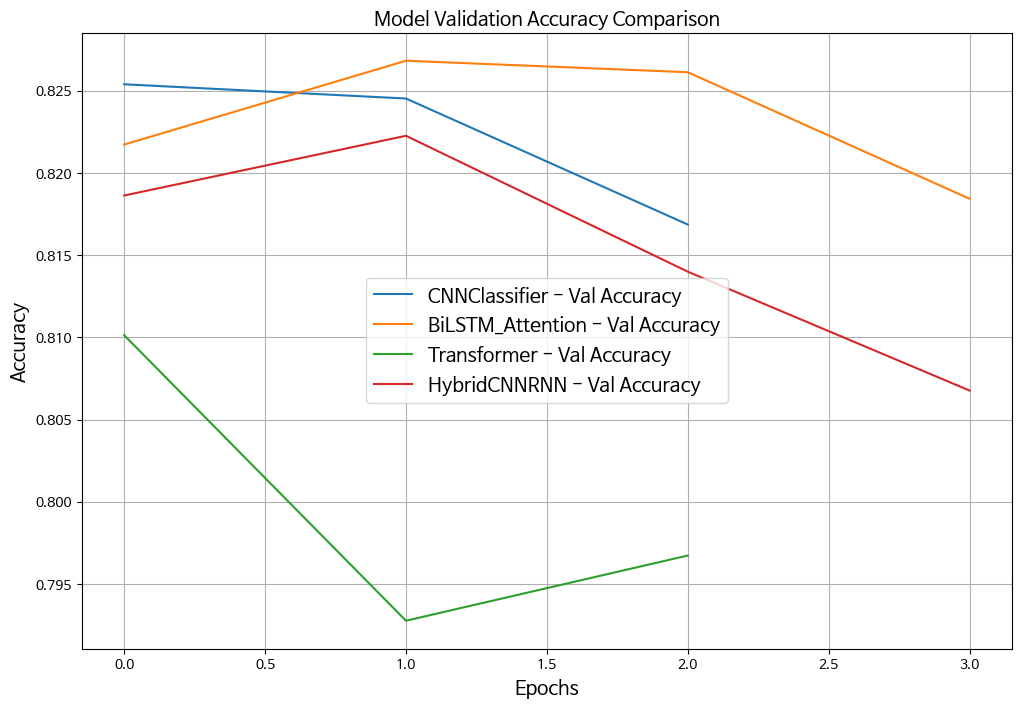

In [ ]:
from tensorflow.keras.models import save_model

# 공통 변수 설정
DATA_OUT = "/content/output"  # 모델 가중치를 저장할 경로
BATCH_SIZE = 32
NUM_EPOCHS = 10
VALID_SPLIT = 0.2

# 콜백 생성 함수
def create_callbacks(model_name):
    checkpoint_path = os.path.join(DATA_OUT, model_name, 'weights.weights.h5')
    checkpoint_dir = os.path.dirname(checkpoint_path)

    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir, exist_ok=True)
        print(f"{checkpoint_dir} -- Folder created\n")
    else:
        print(f"{checkpoint_dir} -- Folder already exists\n")

    earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
    cp_callback = ModelCheckpoint(
        checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True
    )
    return [earlystop_callback, cp_callback]

# 모델 학습 함수
def train_model(model, model_name, train_input, train_label, kargs):
    print(f"Training {model_name}...")

    # 모델 컴파일
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
    )

    # 콜백 생성
    callbacks = create_callbacks(model_name)

    # 모델 학습
    history = model.fit(
        train_input, train_label,
        batch_size=BATCH_SIZE,
        epochs=NUM_EPOCHS,
        validation_split=VALID_SPLIT,
        callbacks=callbacks
    )

    # 모델 저장
    model_save_path = f"/content/sample_data/{model_name}.keras"
    save_model(model, model_save_path)
    print(f"Model saved to {model_save_path}\n")

    return history

# 학습 이력을 저장할 리스트
histories = []

# CNNClassifier 모델 학습
cnn_kargs = {
    "model_name": "cnn_classifier_kr",
    "vocab_size": 10000,
    "embbeding_size": 128,
    "num_filters": 100,
    "dropout_rate": 0.5,
    "hidden_dimension": 250,
    "output_dimension": 1
}
cnn_model = CNNClassifier(**cnn_kargs)
history_cnn = train_model(cnn_model, cnn_kargs["model_name"], train_input, train_label, cnn_kargs)
histories.append(history_cnn)

# BiLSTM_Attention 모델 학습
bilstm_kargs = {
    "model_name": "BiLSTM_Attention",
    "vocab_size": 10000,
    "embbeding_size": 128,
    "lstm_units": 64,
    "dropout_rate": 0.5,
    "output_dimension": 1
}
bi_lstm_model = BiLSTMAttention(**bilstm_kargs)
history_bilstm = train_model(bi_lstm_model, bilstm_kargs["model_name"], train_input, train_label, bilstm_kargs)
histories.append(history_bilstm)

# Transformer 모델 학습
transformer_kargs = {
    "model_name": "Transformer",
    "vocab_size": 10000,
    "embbeding_size": 128,
    "num_layers": 2,
    "num_heads": 4,
    "hidden_dimension": 64,
    "dropout_rate": 0.5,
    "output_dimension": 1
}
transformer_model = TransformerClassifier(**transformer_kargs)
history_transformer = train_model(transformer_model, transformer_kargs["model_name"], train_input, train_label, transformer_kargs)
histories.append(history_transformer)

# HybridCNNRNN 모델 학습
hybrid_kargs = {
    'model_name': 'HybridCNNRNN',
    'vocab_size': prepro_configs['vocab_size'],  # 사전 크기
    'embbeding_size': 128,
    'num_filters': 100,
    'lstm_units': 64,
    'dropout_rate': 0.5,
    'output_dimension': 1
}
hybrid_cnn_rnn_model = HybridCNNRNN(**hybrid_kargs)
history_hybrid = train_model(hybrid_cnn_rnn_model, hybrid_kargs["model_name"], train_input, train_label, hybrid_kargs)
histories.append(history_hybrid)

# 모델 이름 리스트 생성
model_names = ["CNNClassifier", "BiLSTM_Attention", "Transformer", "HybridCNNRNN"]

print("Training complete. Histories saved.")

# 학습 이력 그래프 출력
import matplotlib.pyplot as plt

def plot_histories(histories, model_names):
    plt.figure(figsize=(12, 8))
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], label=f'{name} - Val Accuracy')
    plt.title('Model Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_histories(histories, model_names)


In [ ]:
import pickle

# history.history만 저장
history_dicts = [history.history for history in histories]
with open('training_histories.pkl', 'wb') as f:
    pickle.dump(history_dicts, f)
print("Histories saved successfully.")


Histories saved successfully.


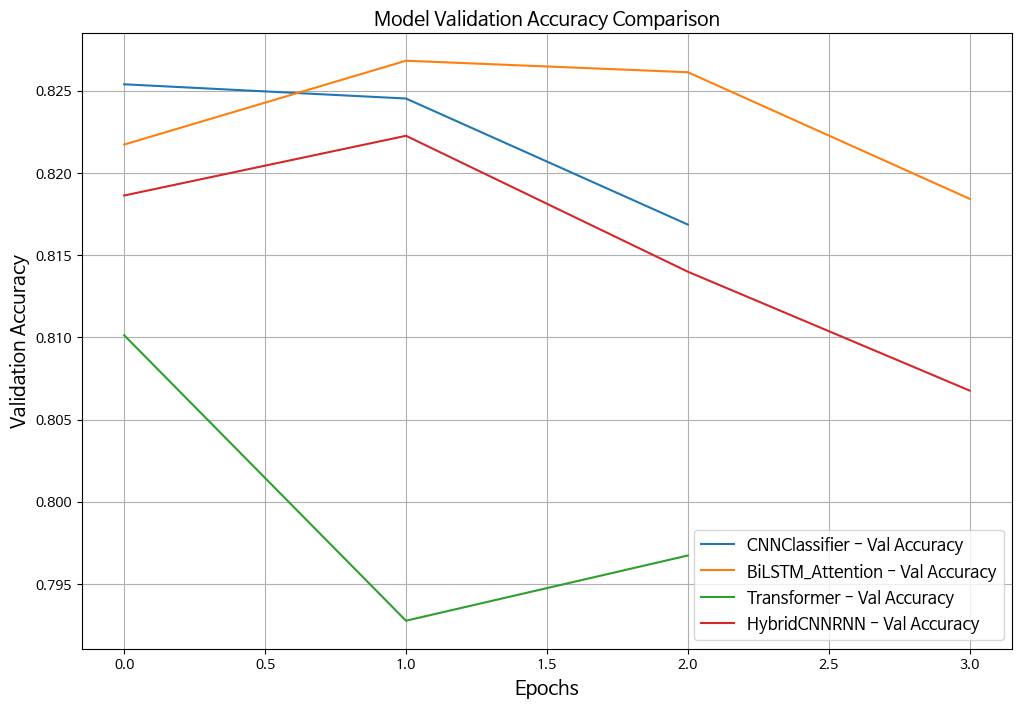

In [ ]:
import pickle
import matplotlib.pyplot as plt

# 학습 이력 로드
with open('training_histories.pkl', 'rb') as f:
    loaded_histories = pickle.load(f)

# 모델 이름 리스트
model_names = ["CNNClassifier", "BiLSTM_Attention", "Transformer", "HybridCNNRNN"]

# 그래프 출력
plt.figure(figsize=(12, 8))
for history, name in zip(loaded_histories, model_names):
    plt.plot(history['val_accuracy'], label=f'{name} - Val Accuracy')
plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


## 학습된 데이터로 테스트 데이터 검증

In [ ]:
# 테스트 데이터 경로 및 파일명
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'

# 테스트 데이터 로드 및 전처리
test_input = np.load(open(os.path.join(DATA_PATH, INPUT_TEST_DATA), 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])  # 입력 데이터 패딩
test_label_data = np.load(open(os.path.join(DATA_PATH, LABEL_TEST_DATA), 'rb'))

# 가중치 파일 경로 확인
models_info = {
    "CNNClassifier": (CNNClassifier, "/content/output/cnn_classifier_kr/weights.weights.h5", {
        'model_name': 'CNNClassifier',
        'vocab_size': prepro_configs['vocab_size'],
        'embbeding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension': 1
    }),
    "BiLSTM_Attention": (BiLSTMAttention, "/content/output/BiLSTM_Attention/weights.weights.h5", {
        'model_name': 'BiLSTM_Attention',
        'vocab_size': prepro_configs['vocab_size'],
        'embbeding_size': 128,
        'lstm_units': 64,
        'dropout_rate': 0.5,
        'output_dimension': 1
    }),
    "Transformer": (TransformerClassifier, "/content/output/Transformer/weights.weights.h5", {
        'model_name': 'Transformer',
        'vocab_size': prepro_configs['vocab_size'],
        'embbeding_size': 128,
        'num_layers': 2,
        'num_heads': 4,
        'hidden_dimension': 64,
        'dropout_rate': 0.5,
        'output_dimension': 1
    }),
    "HybridCNNRNN": (HybridCNNRNN, "/content/output/HybridCNNRNN/weights.weights.h5", {
        'model_name': 'HybridCNNRNN',
        'vocab_size': prepro_configs['vocab_size'],
        'embbeding_size': 128,
        'num_filters': 64,
        'lstm_units': 64,
        'dropout_rate': 0.5,
        'output_dimension': 1
    })
}

# 각 모델에 대해 평가
for model_name, (model_class, model_weights_path, kargs) in models_info.items():
    print(f"\nEvaluating model: {model_name}")

    # 파일 존재 여부 확인
    if not os.path.exists(model_weights_path):
        print(f"Error: Weights file not found at {model_weights_path}")
        continue  # 다음 모델로 넘어감

    # 모델 초기화 및 컴파일
    model = model_class(**kargs)  # 모델마다 맞춤 하이퍼파라미터 사용
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy(name="accuracy")]
    )
    print(f"Model compiled for {model_name}")

    # 가중치 로드
    model.load_weights(model_weights_path)
    print(f"Model weights loaded from {model_weights_path}")

    # 모델 평가
    test_loss, test_accuracy = model.evaluate(test_input, test_label_data, batch_size=BATCH_SIZE)
    print(f"[{model_name}] Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



Evaluating model: CNNClassifier
Model compiled for CNNClassifier
Model weights loaded from /content/output/cnn_classifier_kr/weights.weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4947 - loss: 0.6936
[CNNClassifier] Test Loss: 0.6936, Test Accuracy: 0.4963

Evaluating model: BiLSTM_Attention
Model compiled for BiLSTM_Attention
Model weights loaded from /content/output/BiLSTM_Attention/weights.weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5229 - loss: 0.6930
[BiLSTM_Attention] Test Loss: 0.6930, Test Accuracy: 0.5194

Evaluating model: Transformer
Model compiled for Transformer
Model weights loaded from /content/output/Transformer/weights.weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 48 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5207 - loss: 0.6930
[Transformer] Test Loss: 0.6931, Test Accuracy: 0.5152

Evaluating model: HybridCNNRNN
Model compiled for HybridCNNRNN
Model weights loaded from /content/output/HybridCNNRNN/weights.weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5029 - loss: 0.6931
[HybridCNNRNN] Test Loss: 0.6931, Test Accuracy: 0.5023


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 공통 변수 설정
DATA_PATH = "/content/sample_data/CLEAN_DATA/"  # 테스트 데이터 경로
WEIGHTS_PATH = "/content/output/"  # 가중치 파일 경로
BATCH_SIZE = 32

# 테스트 데이터 로드 함수
def load_test_data(input_file, label_file):
    test_input = np.load(open(os.path.join(DATA_PATH, input_file), 'rb'))
    test_input = pad_sequences(test_input, maxlen=test_input.shape[1])
    test_label = np.load(open(os.path.join(DATA_PATH, label_file), 'rb'))
    return test_input, test_label

# 모델 평가 함수
def evaluate_model(model, model_name, test_input, test_label):
    weights_file = os.path.join(WEIGHTS_PATH, model_name, 'weights.weights.h5')
    if not os.path.exists(weights_file):
        print(f"Error: Weights file for {model_name} not found at {weights_file}.")
        print(f"Please ensure the weights file exists at the specified path or update the path accordingly.\n")
        return None

    print(f"Loading weights for {model_name} from {weights_file}...")
    model.load_weights(weights_file)

    print(f"Evaluating {model_name}...")
    results = model.evaluate(test_input, test_label, batch_size=BATCH_SIZE, verbose=1)
    print(f"{model_name} - Loss: {results[0]:.4f}, Accuracy: {results[1]:.4f}")
    print(results)
    return results

# 테스트 데이터 로드
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'

try:
    test_input, test_label = load_test_data(INPUT_TEST_DATA, LABEL_TEST_DATA)
except FileNotFoundError as e:
    print(f"Error loading test data: {e}")
    print("Please check the test data paths and try again.")
    exit()

# 평가 실행
print("Starting model evaluations...")

# 각각의 모델 이름과 가중치 경로를 설정합니다.
cnn_results = evaluate_model(cnn_model, "cnn_classifier_kr", test_input, test_label)
bilstm_results = evaluate_model(bi_lstm_model, "BiLSTM_Attention", test_input, test_label)
transformer_results = evaluate_model(transformer_model, "Transformer", test_input, test_label)
hybrid_results = evaluate_model(hybrid_cnn_rnn_model, "HybridCNNRNN", test_input, test_label)

# 전체 결과 요약 출력
def summarize_results(results, model_names):
    print("\nSummary of Model Evaluation Results:")
    for res, name in zip(results, model_names):
        if res:
            print(f"{name} - Loss: {res[0]:.4f}, Accuracy: {res[1]:.4f}")
        else:
            print(f"{name} - Evaluation not performed (weights not found)")

summarize_results([cnn_results, bilstm_results, transformer_results, hybrid_results],
                  ["CNNClassifier", "BiLSTM_Attention", "Transformer", "HybridCNNRNN"])

print("All evaluations completed.")


Starting model evaluations...
Loading weights for cnn_classifier_kr from /content/output/cnn_classifier_kr/weights.weights.h5...
Evaluating cnn_classifier_kr...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8262 - loss: 0.3833
cnn_classifier_kr - Loss: 0.3870, Accuracy: 0.8238
[0.38704827427864075, 0.8238000273704529]
Loading weights for BiLSTM_Attention from /content/output/BiLSTM_Attention/weights.weights.h5...
Evaluating BiLSTM_Attention...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8286 - loss: 0.3843
BiLSTM_Attention - Loss: 0.3903, Accuracy: 0.8249
[0.3902992606163025, 0.8248599767684937]
Loading weights for Transformer from /content/output/Transformer/weights.weights.h5...
Evaluating Transformer...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8129 - loss: 0.4075
Transformer - Loss: 0.4134, Accuracy: 0.8094
[0.4133836030960083, 0.8093799948692322]
Loading weights for HybridCNNRNN from /content/output/HybridCNNRNN/weights.weights.h5...
Evaluati

## 문장이 긍정인지 부정인지 예측하기

In [ ]:
!pip install konlpy


In [ ]:
!apt-get update
!apt-get install -y openjdk-11-jdk


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,626 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,516 kB]
Hit:13 https://ppa.launchpadcontent.

감성분석할 문장을 입력해 주세요.: 이거 정말 재미있네요
Successfully loaded weights from /content/output/cnn_classifier_kr/weights.weights.h5
Successfully loaded weights from /content/output/BiLSTM_Attention/weights.weights.h5
Successfully loaded weights from /content/output/Transformer/weights.weights.h5
Successfully loaded weights from /content/output/HybridCNNRNN/weights.weights.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


<ipython-input-37-e29f5276ccbc>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions[name] = float(pred[0])  # 첫 번째 예측값만 가져오기


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
CNNClassifier: 50.01% 확률로 부정 리뷰입니다.
BiLSTM_Attention: 50.23% 확률로 긍정 리뷰입니다.
Transformer: 50.21% 확률로 긍정 리뷰입니다.
HybridCNNRNN: 50.14% 확률로 긍정 리뷰입니다.

샘플 문장에 대한 추가 분석을 진행합니다...

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


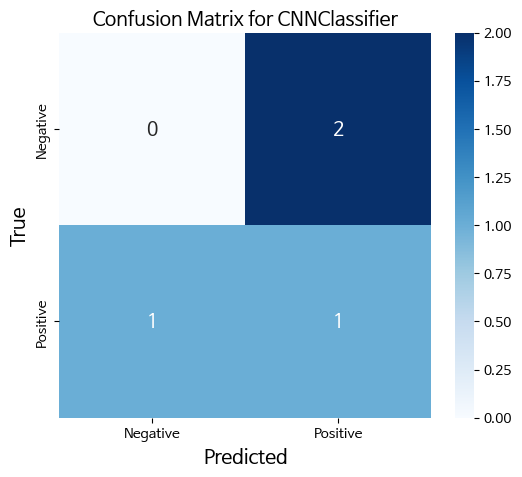


CNNClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4

Accuracy for CNNClassifier: 0.2500

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


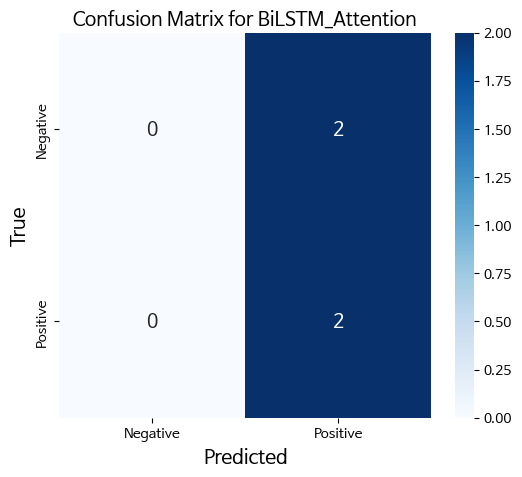


BiLSTM_Attention Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Accuracy for BiLSTM_Attention: 0.5000

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


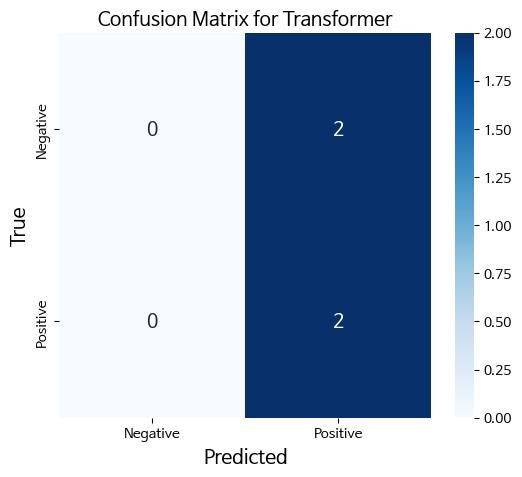


Transformer Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Accuracy for Transformer: 0.5000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


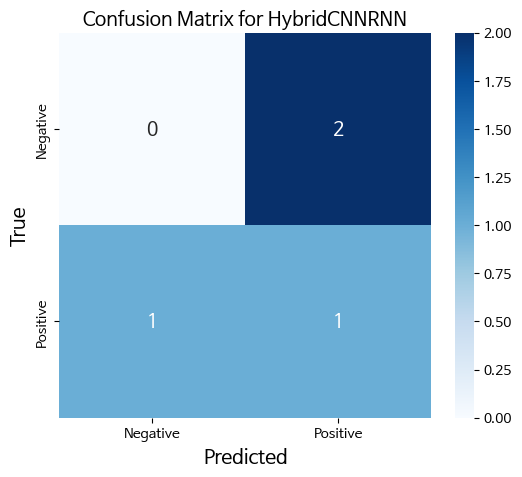


HybridCNNRNN Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4

Accuracy for HybridCNNRNN: 0.2500


모든 모델의 평가가 완료되었습니다.


In [ ]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 형태소 분석기 및 토크나이저 초기화
okt = Okt()
tokenizer = Tokenizer()

# 데이터 설정 불러오기
DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('/content/sample_data/CLEAN_DATA/' + DATA_CONFIGS, 'r'))
word_vocab = prepro_configs['vocab']  # 추가된 부분
tokenizer.fit_on_texts(word_vocab)

# 최대 문장 길이
MAX_LENGTH = 10

# 모델 경로 및 설정
MODEL_PATHS = {
    "CNNClassifier": "/content/output/cnn_classifier_kr/weights.weights.h5",
    "BiLSTM_Attention": "/content/output/BiLSTM_Attention/weights.weights.h5",
    "Transformer": "/content/output/Transformer/weights.weights.h5",
    "HybridCNNRNN": "/content/output/HybridCNNRNN/weights.weights.h5",
}

# 모델 로드 함수
def load_model_safely(model_class, weights_path, model_kargs):
    model = model_class(**model_kargs)
    try:
        model.load_weights(weights_path)
        print(f"Successfully loaded weights from {weights_path}")
    except Exception as e:
        print(f"Error loading weights from {weights_path}: {e}")
        return None
    return model

# 예측 수행 함수
def predict_with_models(sentence, models):
    predictions = {}
    for name, model in models.items():
        if model is None:
            predictions[name] = "Failed to load model"
            continue

        # 입력 데이터를 처리하고 예측 수행
        vector = tokenizer.texts_to_sequences([sentence])
        pad_new = pad_sequences(vector, maxlen=MAX_LENGTH)
        pred = model.predict(pad_new)
        predictions[name] = float(pred[0])  # 첫 번째 예측값만 가져오기
    return predictions

# 혼동 행렬 및 성능 분석 함수
def evaluate_models(test_sentences, test_labels, models):
    results = {}
    for name, model in models.items():
        if model is None:
            print(f"{name}: Failed to load model")
            continue

        # 입력 데이터를 처리
        sequences = tokenizer.texts_to_sequences(test_sentences)
        padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH)

        # 예측 수행
        preds = model.predict(padded_sequences)
        preds_binary = (preds > 0.5).astype(int)

        # 혼동 행렬 및 정확도 계산
        cm = confusion_matrix(test_labels, preds_binary)
        acc = accuracy_score(test_labels, preds_binary)
        results[name] = {
            "confusion_matrix": cm,
            "accuracy": acc,
            "classification_report": classification_report(test_labels, preds_binary)
        }

        # 혼동 행렬 시각화
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title(f"Confusion Matrix for {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

        print(f"\n{name} Classification Report:\n", results[name]["classification_report"])
        print(f"Accuracy for {name}: {results[name]['accuracy']:.4f}\n")
    return results

# 문장 입력 및 처리
while True:
    sentence = input('감성분석할 문장을 입력해 주세요.: ').strip()

    # 입력값 검증: 입력이 없을 경우 다시 요청
    if not sentence:
        print("입력된 문장이 없습니다. 다시 입력해 주세요.")
        continue

    # 입력값 전처리
    sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', sentence)  # 한글 및 공백 이외 제거
    stopwords = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']  # 불용어 리스트
    sentence = okt.morphs(sentence, stem=True)  # 형태소 분석
    sentence = [word for word in sentence if word not in stopwords]  # 불용어 제거

    # 단어가 없는 경우 다시 요청
    if not sentence:
        print("의미 있는 단어가 없습니다. 다시 입력해 주세요.")
        continue

    # 모델 로드 및 예측
    models = {
        "CNNClassifier": load_model_safely(CNNClassifier, MODEL_PATHS["CNNClassifier"], cnn_kargs),
        "BiLSTM_Attention": load_model_safely(BiLSTMAttention, MODEL_PATHS["BiLSTM_Attention"], bilstm_kargs),
        "Transformer": load_model_safely(TransformerClassifier, MODEL_PATHS["Transformer"], transformer_kargs),
        "HybridCNNRNN": load_model_safely(HybridCNNRNN, MODEL_PATHS["HybridCNNRNN"], hybrid_kargs),
    }

    predictions = predict_with_models(sentence, models)

    # 예측 결과 출력
    for model_name, prediction in predictions.items():
        if isinstance(prediction, str):  # 모델 로드 실패
            print(f"{model_name}: {prediction}")
        else:
            sentiment = "긍정" if prediction > 0.5 else "부정"
            confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100
            print(f"{model_name}: {confidence:.2f}% 확률로 {sentiment} 리뷰입니다.")

    # 평가용 샘플 데이터 분석
    test_sentences = ["재미있다", "별로다", "최고다", "형편없다"]  # 평가용 문장 샘플
    test_labels = [1, 0, 1, 0]  # 샘플 문장의 실제 라벨 (1: 긍정, 0: 부정)

    print("\n샘플 문장에 대한 추가 분석을 진행합니다...\n")
    evaluation_results = evaluate_models(test_sentences, test_labels, models)

    print("\n모든 모델의 평가가 완료되었습니다.")
    break
